#### I will be looking at the dataset of Dr Ignaz Semmelweis back in 1818 who worked as physician in Hungary and whose research inadvertently led to the discovery of penicillin, measures and practices to reduce the death of patients in hospitals by simply: WASHING our hands!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
yearly_df = pd.read_csv('annual_deaths_by_clinic.csv')
monthly_df = pd.read_csv('monthly_deaths.csv')

In [3]:
# Preliminary investigation on both dataset
monthly_df.head()
print(monthly_df.columns) # Show the names of the columns
print(f"The monthly_df dataset has {monthly_df.shape[0]} rows and {monthly_df.shape[1]} columns")
print(monthly_df.isna().values.any()) # Checking for NaN values
monthly_df.duplicated().values.any() # Checking for duplicated data in the dataframe

Index(['date', 'births', 'deaths'], dtype='object')
The monthly_df dataset has 98 rows and 3 columns
False


False

In [4]:
print(yearly_df.columns) # Show the names of the columns
print(f"The monthly_df dataset has {yearly_df.shape[0]} rows and {yearly_df.shape[1]} columns")
print(yearly_df.isna().values.any()) # Checking for NaN values
yearly_df.duplicated().values.any() # Checking for duplicated data in the dataframe


Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
The monthly_df dataset has 12 rows and 4 columns
False


False

The dataset looks to have been collected over a period of 5 years. There are clearly no missing and null values in both datasets. Below, I will dig a bit deeper and look at some descriptive statistics of both datasets to help have a face value of what the data may be saying

In [5]:
monthly_df.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [6]:
yearly_df.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


From the descriptive statistics, I can see that there is a grim look the data presents. For the monthly dataset there is a mean of 267 births per month and 22 deaths per month. A near 10 percent of deaths amongst women who delivered in the hospital. The yearly dataset offers no relieve as there is a mean value of 3152 births and 223 women dying. 

In [7]:
# Having a look at the type of the data in both datasets

monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [8]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


The date and year columns in both datasets would need to be converted to Pandas datetime objects

Calculating the percentage of deaths per month

In [9]:
yearly_df.head()
total_births = yearly_df.births.sum()
total_deaths = yearly_df.deaths.sum()
death_percentage = total_deaths / total_births * 100
print(f"The percentage of women dying in the 1840s in Vienna was {death_percentage: .2f}% with a total of {total_births} births. In comparism the United States had a percentage of 0.018% to a hundred thousand births in 2013")

The percentage of women dying in the 1840s in Vienna was  7.08% with a total of 37833 births. In comparism the United States had a percentage of 0.018% to a hundred thousand births in 2013


In [10]:
# Converting the date in the monthly dataset to a Pandas datetime object

monthly_df.date = pd.to_datetime(monthly_df.date)
monthly_df.date

0 1841-01-01
1 1841-02-01
2 1841-03-01
3 1841-04-01
4 1841-05-01
 ... 
93 1848-11-01
94 1848-12-01
95 1849-01-01
96 1849-02-01
97 1849-03-01
Name: date, Length: 98, dtype: datetime64[ns]

Visualising the total number of births and deaths over time

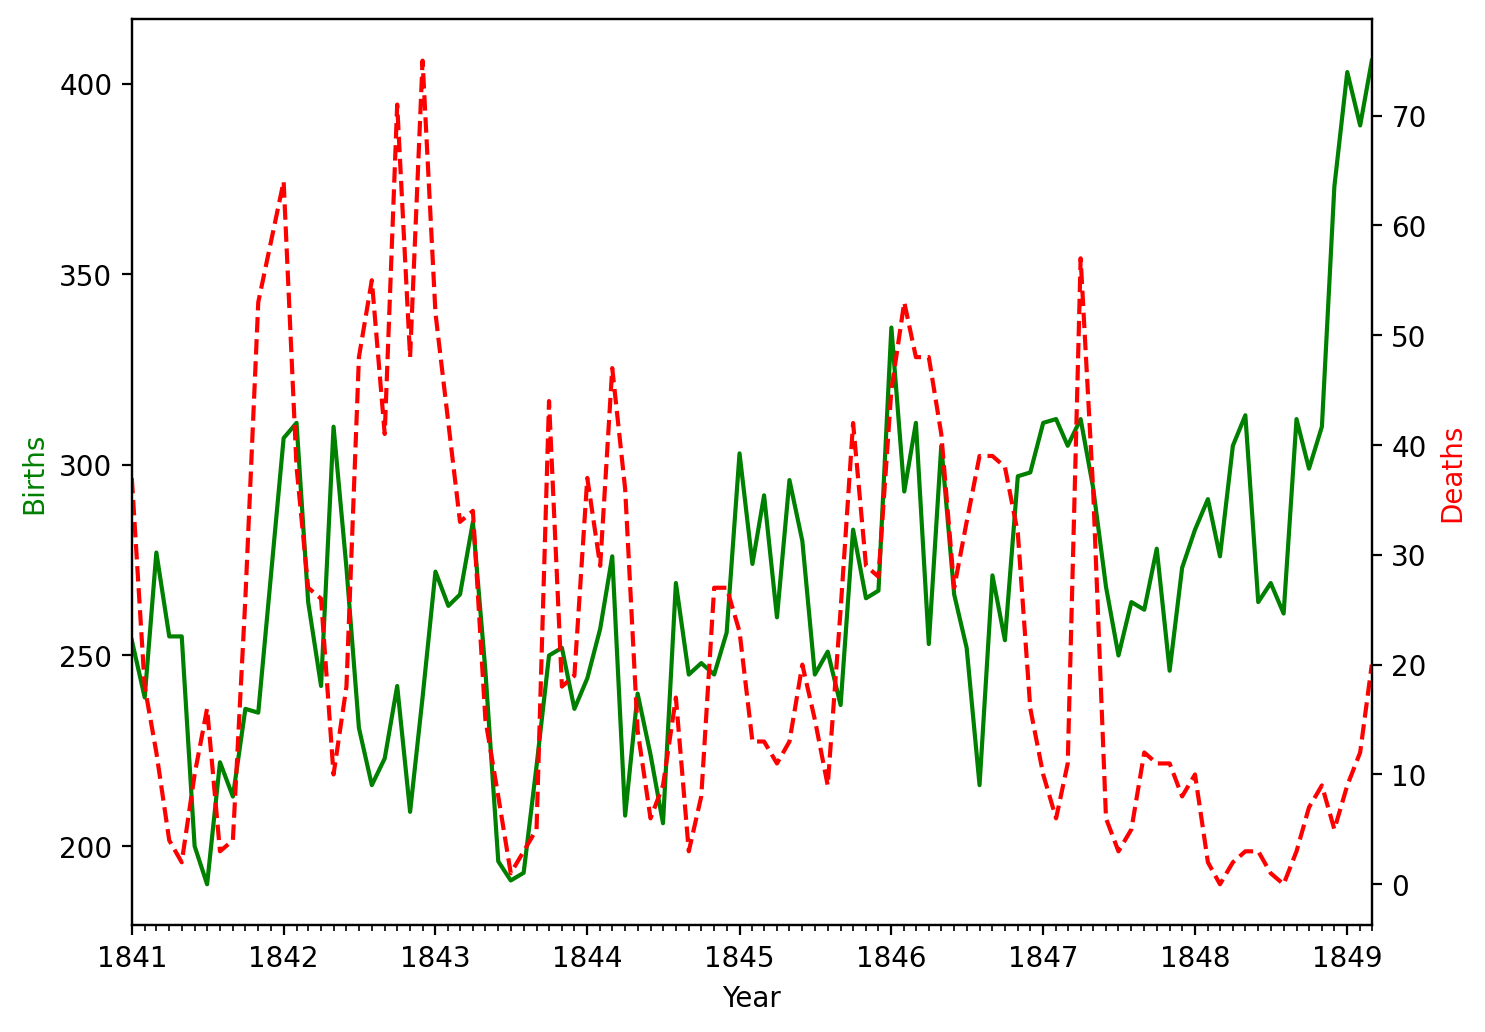

In [11]:
plt.figure(figsize=(8, 6), dpi=200)
ax1 = plt.gca() # Creates the first axis
ax2 = ax1.twinx() # Creates the second axis
# setting the ticks for months and years on the x-axis
years = mdates.YearLocator() # Sets the ticks for the year
months = mdates.MonthLocator() # Sets the ticks for the months
years_fmt = mdates.DateFormatter('%Y') # Formats the date values to be that of the year

# Setting the limit of the x-axis
ax1.set_xlim(monthly_df.date.min(), monthly_df.date.max())
ax1.set_xlabel('Year')
ax1.set_ylabel('Births', color='green')
ax2.set_ylabel('Deaths', color='red')
ax1.plot(monthly_df.date, monthly_df.births, color='g')
ax2.plot(monthly_df.date, monthly_df.deaths, color='r', linestyle='--')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)
plt.show()

From the visualisations we can see that there is a dip in the number of deaths while there is a steady climb on the number of births. 

### I will be having a more indepth look at the yearly data. 

In [12]:
# How many clinics are present in the dataset
yearly_df.clinic.nunique()

2

In [13]:
# Which clinic was bigger and busier judging by the number of births

yearly_df.groupby('clinic', as_index=False).agg({'births': pd.Series.sum})

,clinic,births
0,clinic 1,20042
1,clinic 2,17791


I can tell clinic one was busier by virtue of the number of births. 

In [14]:
# Which hospital had the most patients?
clinic_one = yearly_df[yearly_df.clinic == 'clinic 1']
clinic_two = yearly_df[yearly_df.clinic == 'clinic 2']
print(f"There were a total number of {clinic_one.births.sum() + clinic_one.deaths.sum()} patients in Clinic One")
print(f"There were a total number of {clinic_two.births.sum() + clinic_two.deaths.sum()} patients in Clinic Two")

There were a total number of 22031 patients in Clinic One
There were a total number of 18482 patients in Clinic Two


In [15]:
print(f"The highest number of death recorded in Clinic One was {clinic_one.deaths.max()}.")
print(f"The highest number of death recorded in Clinic Two was {clinic_two.deaths.max()}.")

The highest number of death recorded in Clinic One was 518.
The highest number of death recorded in Clinic Two was 202.


In [16]:
# Visualising the data
fig = px.line(yearly_df, x='year', y='births', color='clinic', title='Births By Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Births')
fig.show()

In [17]:
fig = px.line(yearly_df, x='year', y='deaths', color='clinic', title='Deaths By Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Death')
fig.show()

Calculating the proportion of deaths at each clinic

In [18]:
yearly_df['pct_deaths'] = yearly_df.deaths / yearly_df.births * 100 # creating a new column with the % of deaths calculated per year

In [19]:
yearly_df.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489


In [20]:
average_death_clinic_one = clinic_one.deaths.sum() / clinic_one.births.sum() * 100
print(f"The average number of deaths in Clinic One is: {average_death_clinic_one:.2f}%")

average_death_clinic_two = clinic_two.deaths.sum() / clinic_two.births.sum() * 100
print(f"The average number of deaths in Clinic Two is: {average_death_clinic_two:.2f}%")

The average number of deaths in Clinic One is: 9.92%
The average number of deaths in Clinic Two is: 3.88%


In [21]:
# visualising the proportion of deaths

fig = px.line(yearly_df, x='year', y='pct_deaths', color='clinic', title='Proportion of Deaths By Clinic')
fig.update_layout(xaxis_title='Year', yaxis_title='Percentage of Deaths')
fig.show()

From the above line-chart, it is clear that Clinic One had more deaths and women were most likely to die in Clinic One. In 1842, both clinics recorded a high of 16% and 7.8% respectively. 

<href>https://en.wikipedia.org/wiki/Ignaz_Semmelweis</href>

The story about the data collated from Dr Semmelweis is on the Wikipedia link above. To keep the long story short, he had been taking data to monitor the number of deaths in both clinics. He had noticed there was a reduced number of deaths in Clinic Two, which was manned by midwives. He had then instructed that the delivery positions in Clinic Two be practiced in Clinic One (manned by the doctors and medical students), but that had not reduced the number of deaths. He had even stopped the local priest that came in to pray for the mothers (due to the ridiculous number of women dying), and that did not stop the number of deaths from going up. 

Dr S--if we can call him that, sounds super dope if you ask me--had then decided to take a break. While away, a pathologist friend who was his friend died. And the pathologist had shown symptoms as the mothers who died in the hospital. At this point, he knew it was not the spirits (as rumoured by the people of the city--because women now preferred to deliver on the streets than in the hospital) but something else that could, in fact, kill anyone. 

Dr S would later in 1847--shortly after his friend had died--ask his medical staff to start cleaning their hands and instruments not just with soap and water but with chlorine to get rid of the smell of the doctors and medical students who performed autopsy. 

In [22]:

# Calculating the % of deaths for the monthly data
monthly_df['pct_deaths'] = monthly_df.deaths/monthly_df.births
monthly_df.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [23]:
# Creating two subsets: before and after handwashing was instructed. 
handwashing_date = pd.to_datetime('1847-06-01')
print(handwashing_date)
before_hw = monthly_df[monthly_df.date < handwashing_date]
after_hw = monthly_df[monthly_df.date >= handwashing_date]

1847-06-01 00:00:00


In [24]:
# Checking the average death rate prior to handwashing

before_hw.deaths.sum()/before_hw.births.sum() * 100

10.52577793674314

In [25]:
after_hw.deaths.sum()/after_hw.births.sum() * 100

2.1531463229719483

The introduction of hand washing drastically reduced the mortality rate of women who had put to bed from 10.5% to 2.15%. Although Dr S couldn't offer any theoretical explanation why washing of hands had helped, he could see it had the desired effect. At the time, germs, bacteria and viruses had not been discovered, and using chlorinated water had helped because it was the perfect disinfectant.

In [26]:
before_hw_rdf = before_hw.set_index('date')
before_hw_rdf = before_hw_rdf.rolling(window=6).mean()
before_hw_rdf.head()

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN


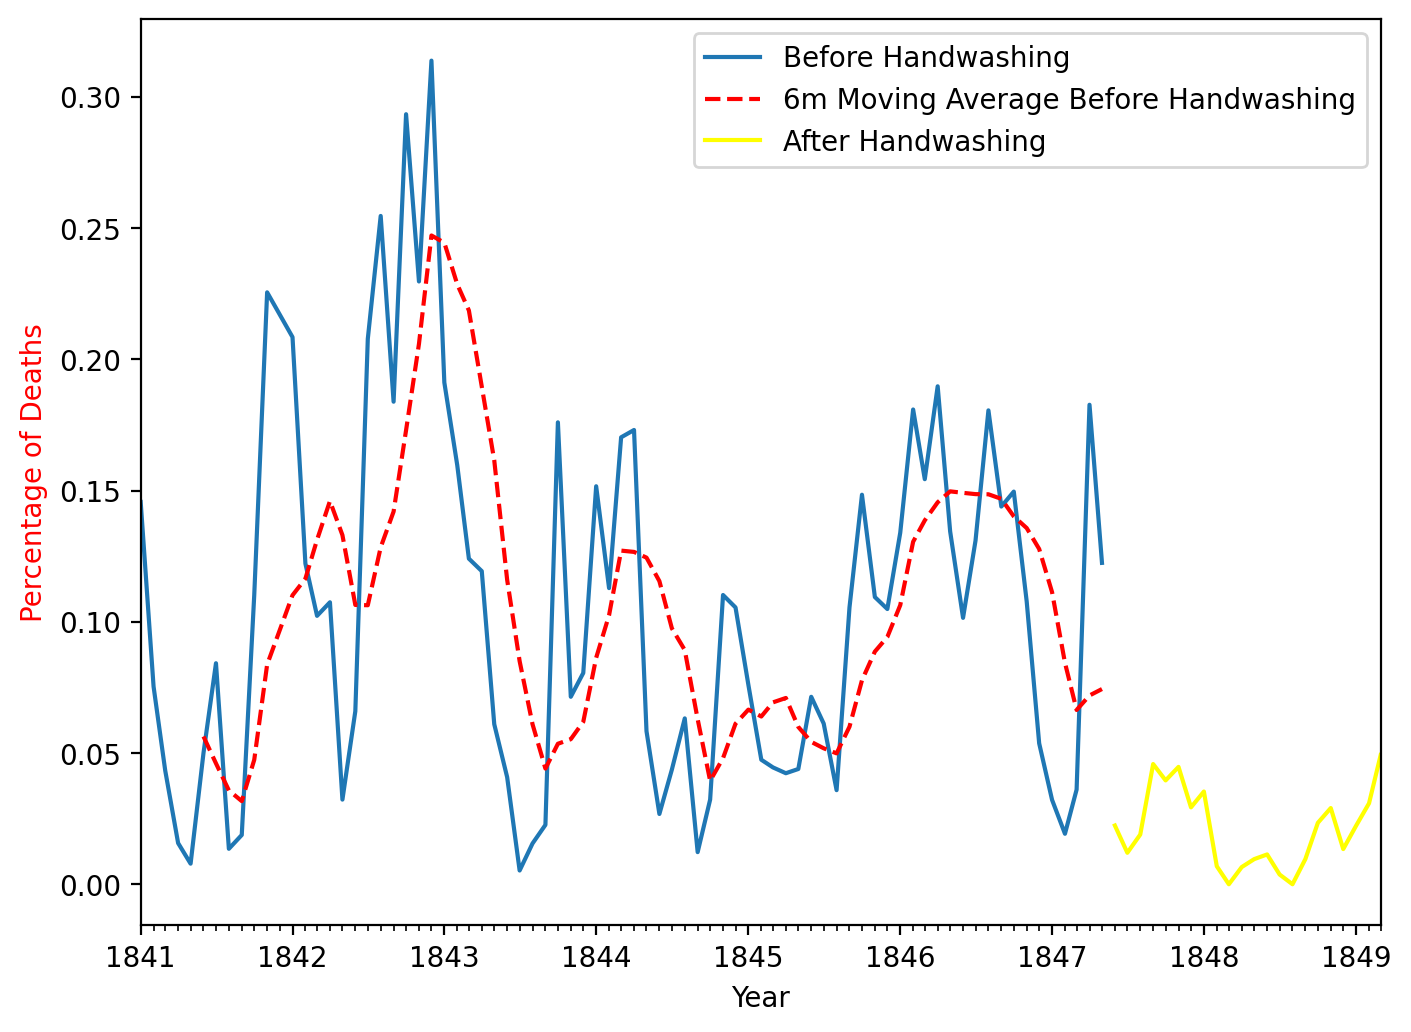

In [27]:
# Visualising the data
plt.figure(figsize=(8, 6), dpi=200)
ax1 = plt.gca() # Creates the first axis
# ax2 = ax1.twinx() # Creates the second axis
# setting the ticks for months and years on the x-axis
years = mdates.YearLocator() # Sets the ticks for the year
months = mdates.MonthLocator() # Sets the ticks for the months
years_fmt = mdates.DateFormatter('%Y') # Formats the date values to be that of the year

# Setting the limit of the x-axis
ax1.set_xlim(monthly_df.date.min(), monthly_df.date.max())
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Deaths', color='red')
# ax2.set_ylabel('Deaths', color='red')
ax1.plot(before_hw.date, before_hw.pct_deaths, label='Before Handwashing')
ax1.plot(before_hw_rdf.index, before_hw_rdf.pct_deaths, color='r', linestyle='--', label='6m Moving Average Before Handwashing')
ax1.plot(after_hw.date, after_hw.pct_deaths, color='yellow', label='After Handwashing')

# setting up a legend
ax1.legend()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)
plt.show()

#### Visualising Distributions and Testing for Statistical Significance of Handwashing. 

Back then, when Dr S introduced hand-washing, he received backlash from the doctors of his time as they considered an insult. Imagine feeling insulted for keeping dirty hands. This had even led to Dr S being put into a mental home which led to his death. The story is, he died from exactly what he cured. He had been beaten up in the home and had been bruised (perhaps with a stick used to whip the mentally ill into obedience). He had later fallen ill from the injuries sustained and passed on thereafter. 

I will be taking a further look at the statistical significance of Dr S inadvertent discovery.

Firstly, looking at the average deaths per month before hand-washing and after--we've calculated this before. 

In [28]:
average_death_before_hw = before_hw.pct_deaths.mean() * 100
average_death_before_hw

10.504998260908788

In [29]:
average_death_after_hw = after_hw.pct_deaths.mean() * 100
average_death_after_hw

2.1093375097254534

In [30]:
# Calculating how much handwashing reduced the chance of dying

print(f"The chance of dying reduced by {average_death_before_hw - average_death_after_hw :.2f}%")

The chance of dying reduced by 8.40%


In [31]:
print(f"There was a {average_death_before_hw/average_death_after_hw :.1f} times improvement")

There was a 5.0 times improvement


This is significant because the average death rate in Clinic One alone was 9%. The overall chance that a woman would die in a year in the Vienna General Hospital was more than 7%. On a monthly basis, the effect was dropped from 10.5% to 2.15% which would indicate an overall drop across all the major statistics. There was an 8.4% reduction in death cases, a five times improvement overall. 

In [32]:
monthly_df['before_after'] = np.where(monthly_df.date < handwashing_date, 'no', 'yes') # Creating a column to show if a date was before or after

In [33]:
fig = px.box(monthly_df, x='before_after', y='pct_deaths', color='before_after', title='Before and After Handwashing')
fig.update_layout(xaxis_title='Before and After', yaxis_title='Percentage of Deaths')
fig.show()

We can see there is a huge difference. The Before had a maximum percentage of more than 30% of women dying per month when compared to about 5% after hand washing was introduced. The minimum value for before also showed that there was a 5% rate of women dying and a 0% after hand washing was introduced. 

In [34]:
# Plotting a histogram and boxplot to view the death percentage


fig = px.histogram(monthly_df, 
                   x='pct_deaths', 
                   color='before_after',
                   barmode='overlay',
                   opacity=0.6,
                   histnorm='percent',
                   nbins=30,
                   marginal='box'
                   )
fig.show()

The information on the histogram seems misleading--as it suggests the death percentage spiked. LOL. That's not the case. It is only just suggesting the survival rate increased drastically by at least 40%

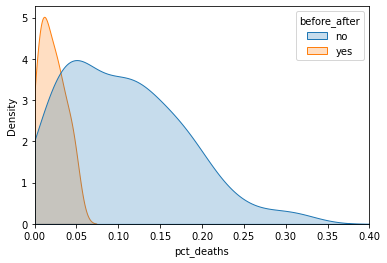

In [35]:
# Plotting a Kernel Density Estimate (KDE) to see the distribution

sns.kdeplot(data=monthly_df, x='pct_deaths', hue='before_after', clip=(0, 1), fill=True)
plt.xlim(0, 0.40)
plt.show()

What does all the visualisation mean? Is it a key pointer that our statistics gotten from the previous calculations are significant?

Well...

I will use the t-test and p-value to evaluate if indeed Dr S's introduction of hand washing was nothing short of a miracle. 

In [36]:
# Finding the t-test and p-value
test = stats.ttest_ind(a=before_hw.pct_deaths, b=after_hw.pct_deaths)
print(f"The t-test is {test[0] :.4f} and the p-value is {test[1] :.10f}")

The t-test is 5.5116 and the p-value is 0.0000002985


We can see that Dr S's introduction of hand washing was statistically significant. The p-value of a test is significant if the value is below 1%. 